# Feature Engineering

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import random

In [2]:
# Adjust settings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
%matplotlib inline

# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
# Load preprocessed dataset

data_path = '../data/interim/'
df = pd.read_pickle(os.path.join(data_path, 'cleaned.pkl'))


In [4]:
# Create new feature for routing as dep arpt_arr arpt
df['routing'] = df['flt_dep_airpt'].astype(str) + '_' + df['flt_arr_airpt'].astype(str)

In [5]:
df.head()

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_TLC_trans,flt_crewt_change,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_tat,block_delay,routing,sched_gt,act_gt,sched_dep_d
0,272024970,New Jessica,East Carmen,2019-06-01 03:50:00,2019-06-01 07:01:00,ECLBAX,other problem,25.0,320,0.0,0.0,Start,"[Sean Weeks_nan_nan_nan_ca, Tony Lloyd_nan_nan...",[],94.0,2019-06-01 03:25:00,2019-06-01 06:45:00,NaN,16.0,New Jessica_East Carmen,95.0,94.0,2019-06-01
1,272022230,East Carmen,South Nathaniel,2019-06-01 08:35:00,2019-06-01 10:41:00,ECLBAX,other problem,15.0,320,60.0,60.0,B,"[Toni Rodriguez_48_60_60_ca, Rachel Smith_48_6...",[],120.0,2019-06-01 08:20:00,2019-06-01 10:35:00,95.0,6.0,East Carmen_South Nathaniel,75.0,120.0,2019-06-01
2,272212848,South Nathaniel,East Carmen,2019-06-01 12:41:00,2019-06-01 14:52:00,ECLBAX,rotational problem,51.0,320,68.0,75.0,A,"[Toni Rodriguez_127_68_75_ca, Rachel Smith_127...",[],86.0,2019-06-01 11:50:00,2019-06-01 14:15:00,NaN,37.0,South Nathaniel_East Carmen,80.0,86.0,2019-06-01
3,271997824,East Carmen,Joneshaven,2019-06-01 16:18:00,2019-06-01 17:32:00,ECLBAX,rotational problem,43.0,320,64.0,70.0,B2,"[Tyler Morris_224_64_70_ca, Sergio Cummings_22...","[ca, cp, ca, ca, ca]",32.0,2019-06-01 15:35:00,2019-06-01 17:00:00,80.0,32.0,East Carmen_Joneshaven,50.0,32.0,2019-06-01
4,271998033,Joneshaven,East Carmen,2019-06-01 18:04:00,2019-06-01 19:14:00,ECLBAX,other problem,14.0,320,42.0,50.0,A,"[Sergio Cummings_279_42_50_cp, Jackie Black_27...",[],NaN,2019-06-01 17:50:00,2019-06-01 19:10:00,NaN,4.0,Joneshaven_East Carmen,NaN,NaN,2019-06-01


In [6]:
# Save flight crew, cabin crew names and their size in new features and drop the original variable afterwards
cp_crew = []
ca_crew = []
cp_count = []
ca_count = []

for crew in df['flt_TLC_trans']:
    cp_help = []
    ca_help = []
    for member in crew:
        if 'cp' in member:
            cp_help.append(member.partition('_')[0])
        elif 'ca' in member:
            ca_help.append(member.partition('_')[0])
    cp_crew.append(sorted(cp_help))
    ca_crew.append(sorted(ca_help))
    cp_count.append(len(cp_help))
    ca_count.append(len(ca_help))

df['cp_crew'] = cp_crew
df['ca_crew'] = ca_crew
df['cp_count'] = cp_count
df['ca_count'] = ca_count

df = df.drop(columns='flt_TLC_trans')

In [7]:
df.head()

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_crewt_change,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_tat,block_delay,routing,sched_gt,act_gt,sched_dep_d,cp_crew,ca_crew,cp_count,ca_count
0,272024970,New Jessica,East Carmen,2019-06-01 03:50:00,2019-06-01 07:01:00,ECLBAX,other problem,25.0,320,0.0,0.0,Start,[],94.0,2019-06-01 03:25:00,2019-06-01 06:45:00,NaN,16.0,New Jessica_East Carmen,95.0,94.0,2019-06-01,"[Andrew Patterson, Joshua Ellis]","[Caleb Davidson, Cassandra Lewis, Sean Weeks, ...",2,4
1,272022230,East Carmen,South Nathaniel,2019-06-01 08:35:00,2019-06-01 10:41:00,ECLBAX,other problem,15.0,320,60.0,60.0,B,[],120.0,2019-06-01 08:20:00,2019-06-01 10:35:00,95.0,6.0,East Carmen_South Nathaniel,75.0,120.0,2019-06-01,"[Mikayla Harris, Rachel Smith]","[Cathy Meyer, Charles Watson, Jessica Holmes, ...",2,4
2,272212848,South Nathaniel,East Carmen,2019-06-01 12:41:00,2019-06-01 14:52:00,ECLBAX,rotational problem,51.0,320,68.0,75.0,A,[],86.0,2019-06-01 11:50:00,2019-06-01 14:15:00,NaN,37.0,South Nathaniel_East Carmen,80.0,86.0,2019-06-01,"[Mikayla Harris, Rachel Smith]","[Cathy Meyer, Charles Watson, Jessica Holmes, ...",2,4
3,271997824,East Carmen,Joneshaven,2019-06-01 16:18:00,2019-06-01 17:32:00,ECLBAX,rotational problem,43.0,320,64.0,70.0,B2,"[ca, cp, ca, ca, ca]",32.0,2019-06-01 15:35:00,2019-06-01 17:00:00,80.0,32.0,East Carmen_Joneshaven,50.0,32.0,2019-06-01,"[Candace Brooks, Sergio Cummings]","[Amanda Aguilar, Antonio Robbins, Jackie Black...",2,4
4,271998033,Joneshaven,East Carmen,2019-06-01 18:04:00,2019-06-01 19:14:00,ECLBAX,other problem,14.0,320,42.0,50.0,A,[],NaN,2019-06-01 17:50:00,2019-06-01 19:10:00,NaN,4.0,Joneshaven_East Carmen,NaN,NaN,2019-06-01,"[Candace Brooks, Sergio Cummings]","[Amanda Aguilar, Antonio Robbins, Jackie Black...",2,4


In [8]:
# Create two new features from flt_crew_change:
# 1. Indicator whether cabin, flight or both crews changed aircraft
# 2. Number of crew members who changed aircraft
def crew_change_cp_ca (row):
    if all(x in row['flt_crewt_change'] for x in ['ca', 'cp']):
        return 'both'
    if 'cp' in row['flt_crewt_change']:
        return 'flight_crew'
    elif 'ca' in row['flt_crewt_change']:
        return 'cabin_crew'
    else:
        return None

def crew_members (row):
    return len(row['flt_crewt_change'])

df['cc_cp_ca'] = df.apply(crew_change_cp_ca, axis=1)
df['cc_count'] = df.apply(crew_members, axis=1)

In [9]:
# Create new features for day of the week and hour of the day
df['day_of_week'] = df['flt_sched_dep'].dt.dayofweek
df['hour_of_day_dep'] = df['flt_sched_dep'].dt.hour
df['hour_of_day_arr'] = df['flt_sched_arr'].dt.hour

# Further data checks

In [10]:
# Check whether flt_crewt_change and flt_crewg match
pd.crosstab(df['flt_crewg'], df['cc_count'])

cc_count,0,1,2,3,4,5,6,7,8
flt_crewg,,,,,,,,,
A,5068,164,122,172,184,187,3,1,1
B,488,0,0,0,0,0,0,0,0
B2,0,0,0,55,58,288,15,0,0
C,0,319,181,98,96,43,1,0,0
Start,4252,0,0,0,0,0,0,0,0


There seems to be a mismatch between the variables flt_crewg and the number of crew members who changed the aircraft based on the definition of the variable flt_crewg according to the documentation:
Crew Group: assignment of what happens to the whole crew after a flight
-  Start : First flight of day
-  A : all crew members stay on the aircraft for the next flight
-  B, B2: all crew members switch aircraft for the next flight
-  C: at least one crew member switches aircraft for the next flight

For flt_crewg == A there should only be cc_count == 0 and for flt_crewg == B there should only be cc_count != 0. Therefore a further analysis is done on that.

In [11]:
# Identifying a specific aircraft wherer flt_crewg == A and cc_count != 0 to analyse the crew changes for a specific date
np.random.seed(42)
indexes = df[(df['flt_crewg'] == 'A') & (df['cc_count'] != 0)].index
sample = random.sample(list(indexes), 3)
print(sample)
df[(df['flt_crewg'] == 'A') & (df['cc_count'] != 0)].loc[sample]

[5620, 11597, 11106]


,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_crewg,flt_crewt_change,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_tat,block_delay,routing,sched_gt,act_gt,sched_dep_d,cp_crew,ca_crew,cp_count,ca_count,cc_cp_ca,cc_count,day_of_week,hour_of_day_dep,hour_of_day_arr
5620,272031122,East Carmen,Lake Richardberg,2019-06-02 08:28:00,2019-06-02 09:09:00,ECLGFX,other problem,28.0,DH4,65.0,55.0,A,"[ca, ca, cp]",25.0,2019-06-02 08:00:00,2019-06-02 08:50:00,55.0,19.0,East Carmen_Lake Richardberg,35.0,25.0,2019-06-02,"[George Baker, Tyler Preston]","[Allison Quinn, Mark Castro]",2,2,both,3,6,8,8
11597,272184354,Susanmouth,East Carmen,2019-06-10 13:15:00,2019-06-10 14:45:00,ECLXDX,other problem,10.0,320,43.0,45.0,A,[ca],79.0,2019-06-10 13:05:00,2019-06-10 14:40:00,NaN,5.0,Susanmouth_East Carmen,50.0,79.0,2019-06-10,"[Brian Bates, Kaitlin Barnes]","[Crystal Moreno, Matthew Anderson, Tonya Lamb,...",2,4,cabin_crew,1,0,13,14
11106,271962975,East Carmen,Susanmouth,2019-06-18 11:06:00,2019-06-18 12:33:00,ECLXAX,other problem,21.0,320,54.0,45.0,A,"[cp, cp, ca, ca, ca]",34.0,2019-06-18 10:45:00,2019-06-18 12:20:00,45.0,13.0,East Carmen_Susanmouth,45.0,34.0,2019-06-18,"[Anthony Perry, John White]","[Austin Lewis, Cassandra Howard, David Price, ...",2,4,both,5,1,10,12


In [12]:
#NEEDS TO BE REDONE - NO RANDOM SEED FIRST TIME

# Now looking at the crew change history of the first registration for the specific day
df[(df['flt_ac_reg'] == 'ECLXBX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-02')].iloc[:,[11, 12, 19, 20, 21, 22, 23, 24]]

,flt_crewg,flt_crewt_change,sched_gt,act_gt,sched_dep_d,cp_crew,ca_crew,cp_count
11186,Start,[],45.0,-10.0,2019-06-02,"[Jacob Davis, Larry Foster]","[Cody Powell, Derek Hendricks, Hunter Harper, ...",2
11187,A,[],45.0,62.0,2019-06-02,"[Jacob Davis, Larry Foster]","[Cody Powell, Derek Hendricks, Hunter Harper, ...",2
11188,A,"[ca, ca, cp, cp, ca]",70.0,69.0,2019-06-02,"[Jacob Davis, Larry Foster]","[Cody Powell, Derek Hendricks, Hunter Harper, ...",2
11189,A,[ca],50.0,124.0,2019-06-02,"[Mckenzie Reed, Shawn Schultz]","[Candice Smith, Jeremy Patel, Jimmy Lewis, Nat...",2
11190,A,"[ca, ca, ca, cp, cp]",70.0,9.0,2019-06-02,"[Mckenzie Reed, Shawn Schultz]","[Candice Smith, Jeremy Patel, Nathaniel Pineda...",2
11191,A,[],NaN,NaN,2019-06-02,"[Mckenzie Reed, Shawn Schultz]","[Candice Smith, Jeremy Patel, Nathaniel Pineda...",2


Based on the hypothesis that the names of the crews are being recorded correctly as this might not only be relevant for payroll accounting but also from regulative perspective the flt_crewg and flt_crewt_change values should be the following:
|   | flt_crewg | flt_crewt_change |
| --- | --- | --- |
400 | A | [] |
432 | C | [ca] |
489 | B | [cp, cp, ca, ca, ca, ca] |
543 | C | [ca] |
599 | A | [] |
1137 | NaN | NaN |

In [13]:
#NEEDS TO BE REDONE - NO RANDOM SEED FIRST TIME

# Let's have a detailed look at the second example
df[(df['flt_ac_reg'] == 'ECLGBX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-28')].iloc[:,[11, 12, 19, 20, 21, 22, 23, 24]]

,flt_crewg,flt_crewt_change,sched_gt,act_gt,sched_dep_d,cp_crew,ca_crew,cp_count
5439,Start,[],40.0,76.0,2019-06-28,"[Nicholas Rocha, Olivia Jacobs]","[Mark Gross, Monique Soto]",2
5440,C,[cp],40.0,40.0,2019-06-28,"[Molly Woods, Stacy Heath]","[Emily Oconnell, John Martinez]",2
5441,A,[],40.0,0.0,2019-06-28,"[Molly Woods, Stacy Heath]","[Emily Oconnell, John Martinez]",2
5442,C,[ca],40.0,22.0,2019-06-28,"[Abigail Garcia, Stacy Heath]","[Jacqueline Wright, John Martinez]",2
5443,Start,[],55.0,70.0,2019-06-28,"[Derek Sweeney, Katie Gallegos]","[Brian Lopez, Teresa Garner]",2
5444,A,"[ca, ca, cp]",40.0,105.0,2019-06-28,"[Katie Gallegos, Patrick Cardenas]","[Brian Lopez, Teresa Garner]",2
5445,A,[],40.0,48.0,2019-06-28,"[Katie Gallegos, Patrick Cardenas]","[Brian Lopez, Teresa Garner]",2
5446,A,[],40.0,-45.0,2019-06-28,"[Katie Gallegos, Patrick Cardenas]","[Brian Lopez, Teresa Garner]",2
5447,Start,[],40.0,119.0,2019-06-28,"[Destiny Sanchez, Melissa Williams]","[Cynthia Johnson, William Martinez]",2
5448,A,[],30.0,427.0,2019-06-28,"[Destiny Sanchez, Melissa Williams]","[Cynthia Johnson, William Martinez]",2


For the second example the values should be the following:
|   | flt_crewg | flt_crewt_change |
| --- | --- | --- |
10705 | B | [cp, cp, ca, ca] |
10738 | A | [] |
10782 | C | [cp, cp, ca] |
10810 | B | [cp, cp, ca, ca] |
10862 | C | [cp, cp] |
10899 | A | [] |
10932 | A | [] |
10988 | B | [cp, cp, ca, ca] |
11031 | A | [] |
11061 | A | [] |
11106 | NaN | NaN |

In [14]:
#NEEDS TO BE REDONE - NO RANDOM SEED FIRST TIME

# Let's have a detailed look at the third example
df[(df['flt_ac_reg'] == 'ECLGRX') & (df['flt_sched_dep'].dt.strftime('%Y-%m-%d') == '2019-06-05')].iloc[:,[11, 12, 19, 20, 21, 22, 23, 24]]

,flt_crewg,flt_crewt_change,sched_gt,act_gt,sched_dep_d,cp_crew,ca_crew,cp_count
7604,B2,"[cp, ca, ca]",50.0,83.0,2019-06-05,"[Elizabeth Avila, Luis Patel]","[James Harris, Matthew Wallace]",2
7605,A,[],65.0,83.0,2019-06-05,"[Elizabeth Avila, Luis Patel]","[James Harris, Matthew Wallace]",2
7606,Start,[],55.0,-1.0,2019-06-05,"[Kyle Chapman, Samantha Ball]","[Eduardo Ho, Sergio Ponce]",2
7607,A,[],55.0,120.0,2019-06-05,"[Kyle Chapman, Samantha Ball]","[Eduardo Ho, Sergio Ponce]",2
7608,A,"[cp, cp, ca]",40.0,58.0,2019-06-05,"[Kyle Chapman, Samantha Ball]","[Eduardo Ho, Todd Young]",2
7609,A,[],45.0,-29.0,2019-06-05,"[Kyle Chapman, Samantha Ball]","[Eduardo Ho, Todd Young]",2
7610,A,[],NaN,NaN,2019-06-05,"[Kyle Chapman, Samantha Ball]","[Eduardo Ho, Todd Young]",2


For the second example the values should be the following:
|   | flt_crewg | flt_crewt_change |
| --- | --- | --- |
1593 | A | [] |
1655 | B | [cp, cp, ca, ca] |
1739 | A | [] |
1781 | C | [ca] |
1824 | A | [] |
1874 | A | [] |
1921 | NaN | Nan |

Within this sample only a few entries in flt_crewg and flt_crewt_change match with the data crew data over the rotation of a single registration over a day. Furthermore, there is a general error in the variable flt_crewg as it always shows Start for the first leg of the day, however the variable shall state "what happens to the whole crew after a flight".
Due to this new features to capture crew changes will be established based on the columns cp_crew and ca_crew for the rotation of a specific aircraft on any given day.

In [15]:
# Creating new features to track crew changes from the flight before: cc_type {0: Start - First flight of the day, 1: No crew change;
# 2: At least one member but not all of the crew changed; 3: Whole crew changed}; cc_roles [list of elements either ca or cp with an
# entry for every crew member that changed aircraft]

# Furthermore routing check could be included and update of cc_count and cc_ca_cp could be incorporated

def crew_changes (registrations):
    # Create an empty df that will be appended in every step and finally returned by the function
    cc = pd.DataFrame(columns=['cc_types', 'cc_roles'])
    # Loop through the aircrafts and sort their flights by sched_dep
    for aircraft in registrations:
        indexes = df[df['flt_ac_reg'] == aircraft].sort_values(by='flt_sched_dep').index
        date = '2019-01-01'
        # Loop through the indexes of a specific aircraft
        for idx in indexes:
            cc_roles = []
            # If index has new date and therefore is first flight of the day
            if date not in str(df['flt_sched_dep'].loc[idx]):
                date = str(df['flt_sched_dep'].loc[idx]).partition(' ')[0]
                cp = df['cp_crew'].loc[idx]
                ca = df['ca_crew'].loc[idx]
                help = pd.DataFrame([[0, []]], columns=['cc_types', 'cc_roles'], index=[idx])
            else:
                # Check differences between flight and cabin crew from previous flight
                dif_cp = list(set(cp) - set(df['cp_crew'].loc[idx]))
                dif_ca = list(set(ca) - set(df['ca_crew'].loc[idx]))
                # If no crew members changed
                if (len(dif_cp) == 0) and (len(dif_ca) == 0):
                    help = pd.DataFrame([[1, []]], columns=['cc_types', 'cc_roles'], index=[idx])
                # If all crew members changed
                elif (len(dif_cp) >= len(cp)) and (len(dif_ca) >= len(ca)):
                    for item in dif_cp:
                        cc_roles.append('cp')
                    for item in dif_ca:
                        cc_roles.append('ca')
                    help = pd.DataFrame([[3, cc_roles]], columns=['cc_types', 'cc_roles'], index=[idx])
                else:
                    for item in dif_cp:
                        cc_roles.append('cp')
                    for item in dif_ca:
                        cc_roles.append('ca')
                    help = pd.DataFrame([[2, cc_roles]], columns=['cc_types', 'cc_roles'], index=[idx])
                cp = df['cp_crew'].loc[idx]
                ca = df['ca_crew'].loc[idx]
            cc = cc.append(help)
    return cc

# Create a list of all registrations in the dataset
registrations = df['flt_ac_reg'].unique()

df = pd.merge(df, crew_changes(registrations), left_index=True, right_index=True)
# Finally drop old columns
df = df.drop(columns=['flt_crewg', 'flt_crewt_change'])

# Visual data analysis

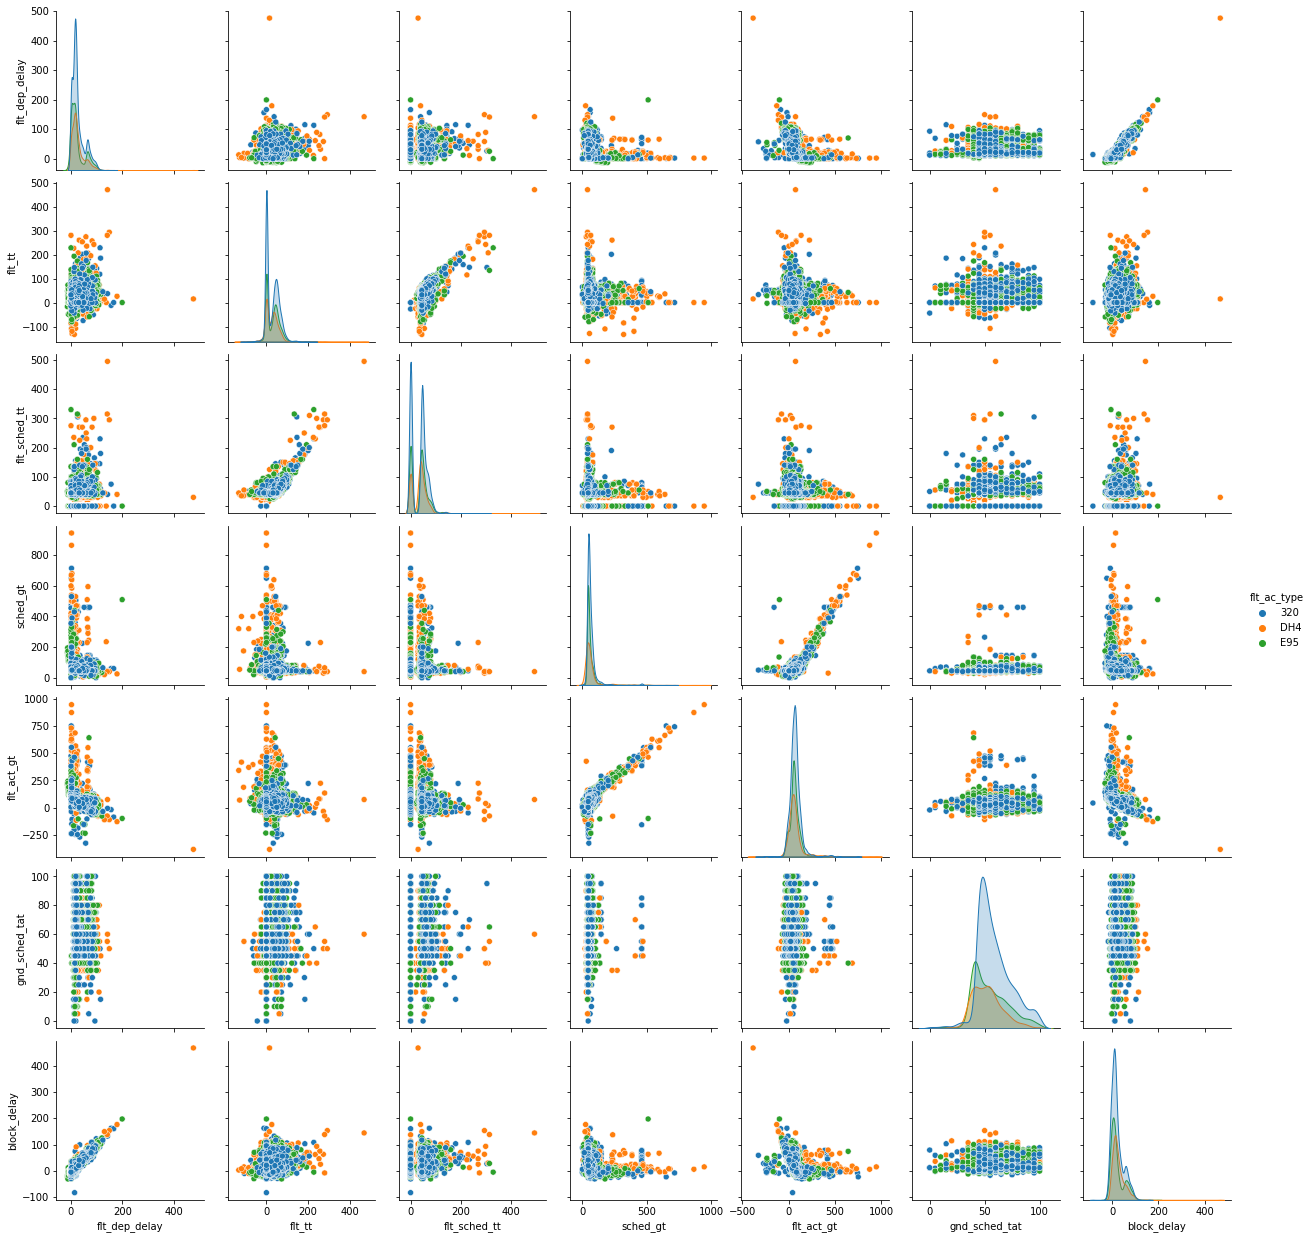

In [17]:
    # Pairplot of all numerical values including dependent variable
    data = df[['flt_dep_delay', 'flt_tt', 'flt_sched_tt', 'sched_gt', 'flt_act_gt', 'gnd_sched_tat', 'block_delay']]
    sns.pairplot(df, hue='flt_ac_type', vars=data, diag_kind='kde')

<AxesSubplot:>

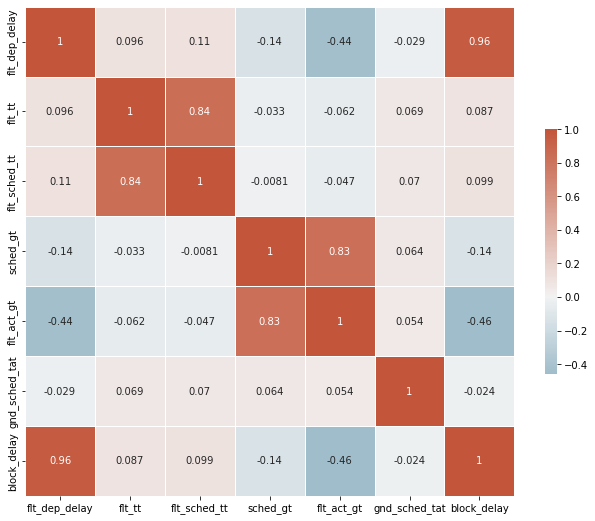

In [18]:
corr = data.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=1, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
df.head()

,flt_leg,flt_dep_airpt,flt_arr_airpt,flt_offblock,flt_onblock,flt_ac_reg,flt_change_code,flt_dep_delay,flt_ac_type,flt_tt,flt_sched_tt,flt_act_gt,flt_sched_dep,flt_sched_arr,gnd_sched_tat,block_delay,routing,sched_gt,act_gt,sched_dep_d,cp_crew,ca_crew,cp_count,ca_count,cc_cp_ca,cc_count,day_of_week,hour_of_day_dep,hour_of_day_arr,cc_types,cc_roles
0,272024970,New Jessica,East Carmen,2019-06-01 03:50:00,2019-06-01 07:01:00,ECLBAX,other problem,25.0,320,0.0,0.0,94.0,2019-06-01 03:25:00,2019-06-01 06:45:00,NaN,16.0,New Jessica_East Carmen,95.0,94.0,2019-06-01,"[Andrew Patterson, Joshua Ellis]","[Caleb Davidson, Cassandra Lewis, Sean Weeks, ...",2,4,None,0,5,3,6,0,[]
1,272022230,East Carmen,South Nathaniel,2019-06-01 08:35:00,2019-06-01 10:41:00,ECLBAX,other problem,15.0,320,60.0,60.0,120.0,2019-06-01 08:20:00,2019-06-01 10:35:00,95.0,6.0,East Carmen_South Nathaniel,75.0,120.0,2019-06-01,"[Mikayla Harris, Rachel Smith]","[Cathy Meyer, Charles Watson, Jessica Holmes, ...",2,4,None,0,5,8,10,3,"[cp, cp, ca, ca, ca, ca]"
2,272212848,South Nathaniel,East Carmen,2019-06-01 12:41:00,2019-06-01 14:52:00,ECLBAX,rotational problem,51.0,320,68.0,75.0,86.0,2019-06-01 11:50:00,2019-06-01 14:15:00,NaN,37.0,South Nathaniel_East Carmen,80.0,86.0,2019-06-01,"[Mikayla Harris, Rachel Smith]","[Cathy Meyer, Charles Watson, Jessica Holmes, ...",2,4,None,0,5,11,14,1,[]
3,271997824,East Carmen,Joneshaven,2019-06-01 16:18:00,2019-06-01 17:32:00,ECLBAX,rotational problem,43.0,320,64.0,70.0,32.0,2019-06-01 15:35:00,2019-06-01 17:00:00,80.0,32.0,East Carmen_Joneshaven,50.0,32.0,2019-06-01,"[Candace Brooks, Sergio Cummings]","[Amanda Aguilar, Antonio Robbins, Jackie Black...",2,4,both,5,5,15,17,3,"[cp, cp, ca, ca, ca, ca]"
4,271998033,Joneshaven,East Carmen,2019-06-01 18:04:00,2019-06-01 19:14:00,ECLBAX,other problem,14.0,320,42.0,50.0,NaN,2019-06-01 17:50:00,2019-06-01 19:10:00,NaN,4.0,Joneshaven_East Carmen,NaN,NaN,2019-06-01,"[Candace Brooks, Sergio Cummings]","[Amanda Aguilar, Antonio Robbins, Jackie Black...",2,4,None,0,5,17,19,1,[]


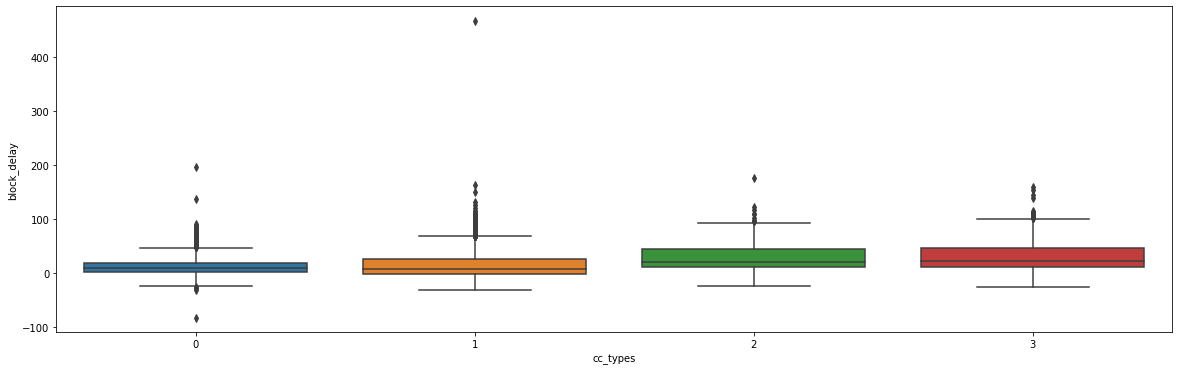

In [20]:
f, ax = plt.subplots(figsize=(20, 6))
ax = sns.boxplot(x=df['cc_types'], y=df['block_delay'])
#len(df['block_delay'])
#x=df['flt_dep_airpt'],

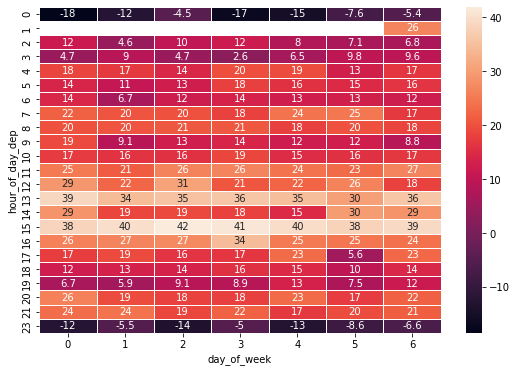

In [21]:
# Heatmap for day of week, hour of day and block_delay
data = df.pivot_table(index='hour_of_day_dep', columns='day_of_week', values='block_delay', aggfunc=np.mean)
f, ax = plt.subplots(figsize=(9, 6))
ax = sns.heatmap(data, annot=True,linewidths=.5, ax=ax)

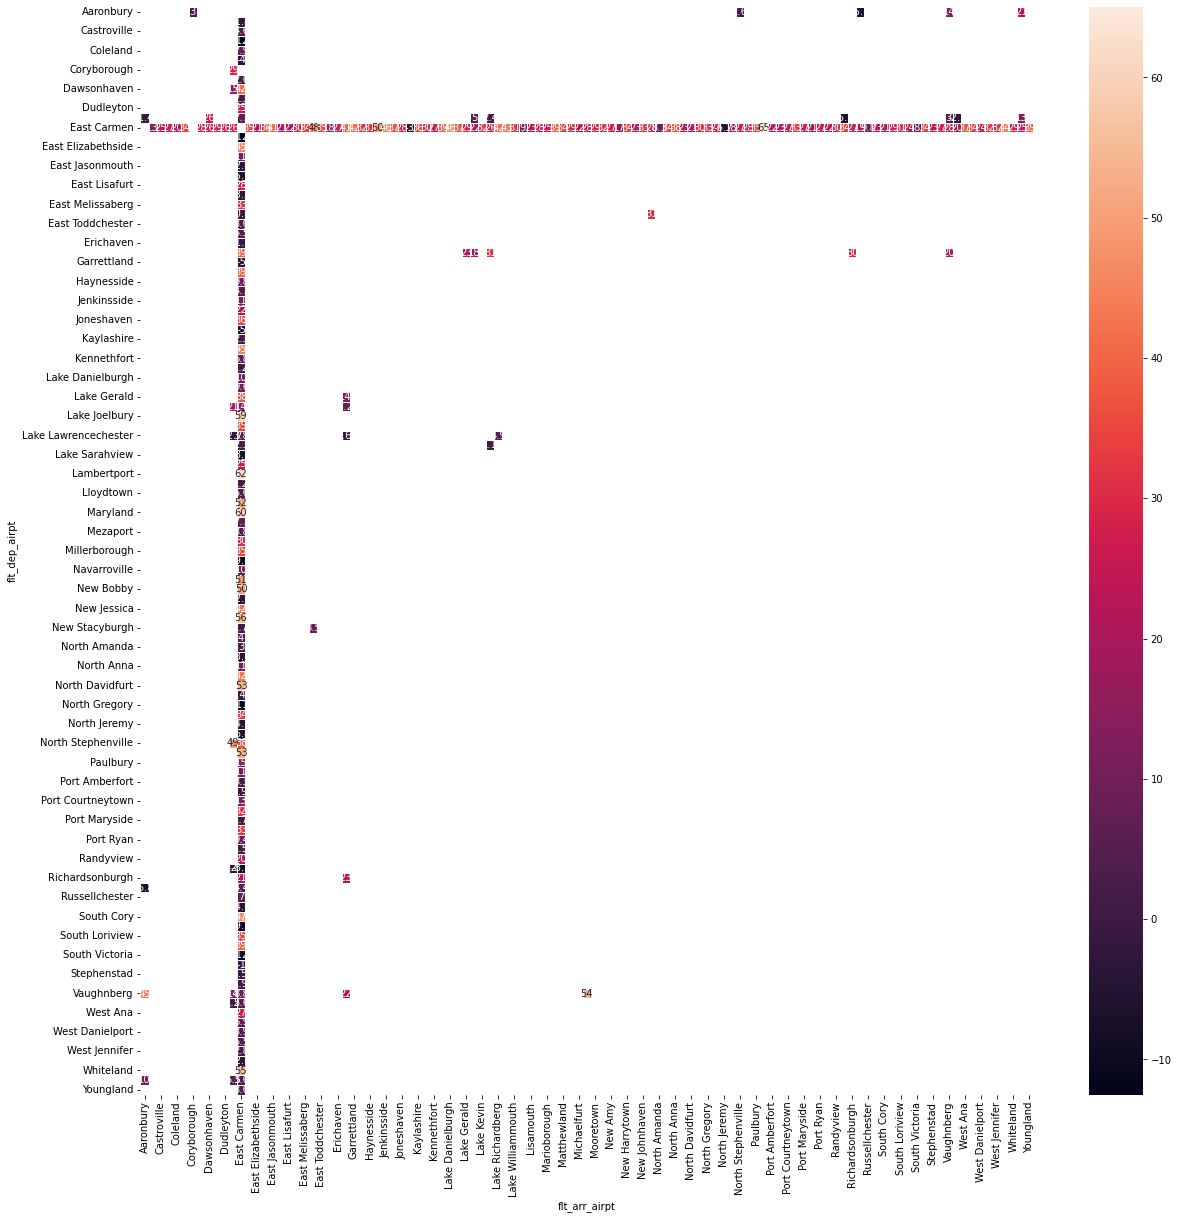

In [22]:
# Heatmap for day of week, hour of day and block_delay
data = df.pivot_table(index='flt_dep_airpt', columns='flt_arr_airpt', values='block_delay', aggfunc=np.mean)
f, ax = plt.subplots(figsize=(20, 20))
ax = sns.heatmap(data, annot=True,linewidths=.5, ax=ax)

<AxesSubplot:xlabel='flt_sched_dep', ylabel='block_delay'>

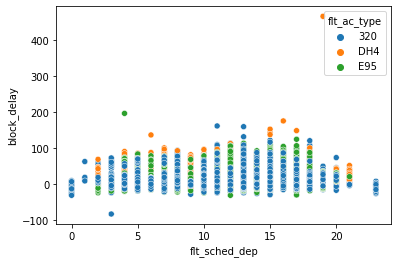

In [23]:
# Plot Scatterplot of block_delay vs time on date
sns.scatterplot(x=df['flt_sched_dep'].dt.hour, y=df['block_delay'], hue=df['flt_ac_type'])

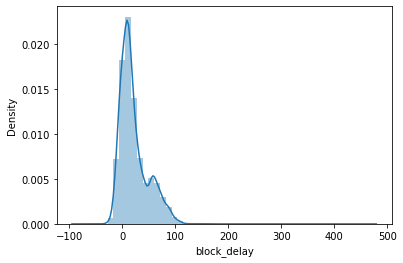

In [24]:
# Plot histogram of dependent variable including pdf
sns.distplot(df['block_delay'], kde=True);

In [25]:
df.to_csv('../data/processed/final.csv')
df.to_pickle('../data/processed/final.pkl')